NET METERING INSTALLED CAPACITY DATA ANALYSIS

1. Loading dataset...
   Total records loaded: 18537

2. Data cleaning...
   Records after cleaning: 17692

3. Connection type analysis...
   Three-Phase Connections: 9,408 (53.2%)
   One-Phase Connections: 8,284 (46.8%)

4. Creating visualization...


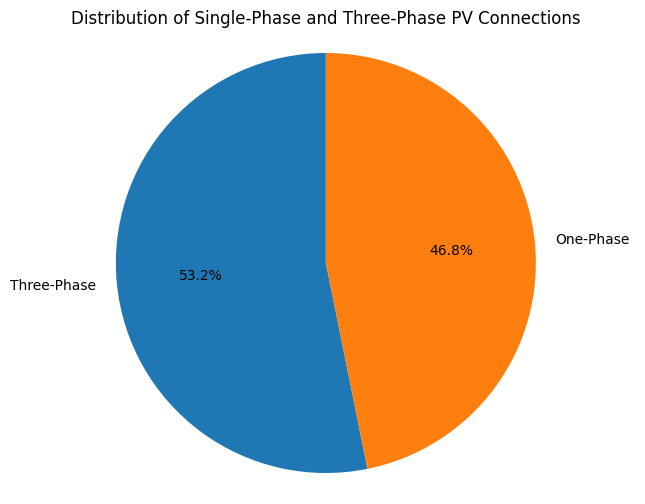

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
import scipy.stats as stats
import seaborn as sns

warnings.filterwarnings('ignore')

print("=" * 60)
print("NET METERING INSTALLED CAPACITY DATA ANALYSIS")
print("=" * 60)

# Load dataset
print("\n1. Loading dataset...")
df = pd.read_excel('Net_Metering_IC1.xlsx')
print(f"   Total records loaded: {len(df)}")

# Data cleaning
print("\n2. Data cleaning...")
df_cleaned = df.dropna(subset=['Power', 'Phase'])
print(f"   Records after cleaning: {len(df_cleaned)}")

# Count connection types
print("\n3. Connection type analysis...")
three_phase = len(df_cleaned[df_cleaned['Phase'] == '3Φ'])
one_phase = len(df_cleaned) - three_phase

print(f"   Three-Phase Connections: {three_phase:,} ({three_phase/len(df_cleaned)*100:.1f}%)")
print(f"   One-Phase Connections: {one_phase:,} ({one_phase/len(df_cleaned)*100:.1f}%)")

# Create pie chart
print("\n4. Creating visualization...")
plt.figure(figsize=(8, 6))
plt.pie([three_phase, one_phase], labels=['Three-Phase', 'One-Phase'], 
        autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Single-Phase and Three-Phase PV Connections')
plt.axis('equal')
plt.show()


SINGLE-PHASE POWER CAPACITY ANALYSIS

1. Processing single-phase data...
   Records processed: 8232
   Mean: 3.66 kW

2. Creating histogram...


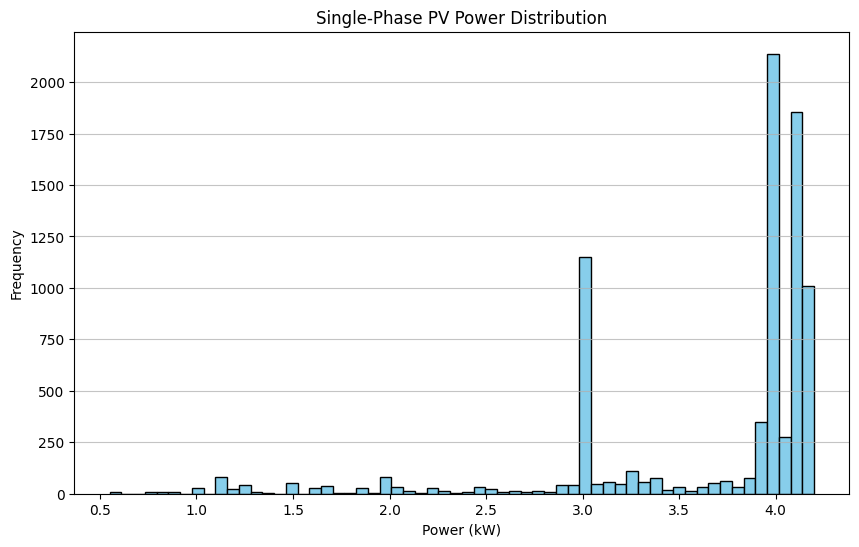

In [2]:
# Single-Phase Power Analysis
print("\n" + "="*50)
print("SINGLE-PHASE POWER CAPACITY ANALYSIS")
print("="*50)

# Extract single-phase power data
print("\n1. Processing single-phase data...")
one_phase_power = df_cleaned[df_cleaned['Phase'] != '3Φ']['Power']
one_phase_power = pd.to_numeric(one_phase_power, errors='coerce')
one_phase_power.dropna(inplace=True)

# Convert watts to kW if needed
one_phase_power[one_phase_power > 500] = one_phase_power[one_phase_power > 500] / 1000
one_phase_power = one_phase_power[one_phase_power <= 4.2]

print(f"   Records processed: {len(one_phase_power)}")
print(f"   Mean: {one_phase_power.mean():.2f} kW")
# Create histogram
print("\n2. Creating histogram...")
plt.figure(figsize=(10, 6))
plt.hist(one_phase_power, bins=60, color='skyblue', edgecolor='black')
plt.title('Single-Phase PV Power Distribution')
plt.xlabel('Power (kW)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


THREE-PHASE POWER CAPACITY ANALYSIS

1. Processing three-phase data...
   Records processed: 9357
   Mean: 5.76 kW

2. Creating histogram...


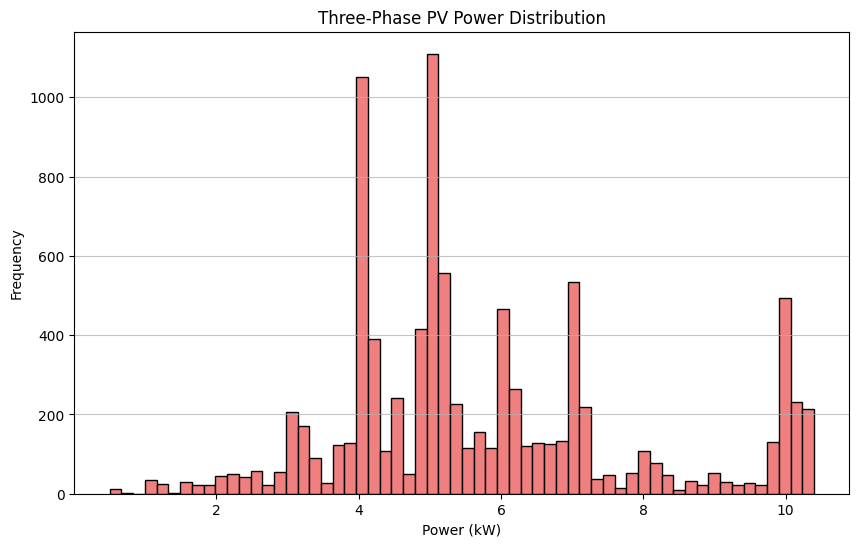

In [3]:
# Three-Phase Power Analysis
print("\n" + "="*50)
print("THREE-PHASE POWER CAPACITY ANALYSIS")
print("="*50)

# Extract three-phase power data
print("\n1. Processing three-phase data...")
three_phase_power = df_cleaned[df_cleaned['Phase'] == '3Φ']['Power']
three_phase_power = pd.to_numeric(three_phase_power, errors='coerce')
three_phase_power.dropna(inplace=True)

# Convert watts to kW if needed
three_phase_power[three_phase_power > 500] = three_phase_power[three_phase_power > 500] / 1000
three_phase_power = three_phase_power[three_phase_power <= 10.4]

print(f"   Records processed: {len(three_phase_power)}")
print(f"   Mean: {three_phase_power.mean():.2f} kW")

# Create histogram
print("\n2. Creating histogram...")
plt.figure(figsize=(10, 6))
plt.hist(three_phase_power, bins=60, color='lightcoral', edgecolor='black')
plt.title('Three-Phase PV Power Distribution')
plt.xlabel('Power (kW)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


STATISTICAL DISTRIBUTION FITTING - SINGLE-PHASE DATA

1. Analyzing 8232 single-phase installations...
2. Testing statistical distributions...

3. Results - Top 5 distributions:
   1. t: AIC = 9497.75
   2. cauchy: AIC = 9919.28
   3. gumbel_l: AIC = 12467.21
   4. weibull_min: AIC = 12469.21
   5. logistic: AIC = 16264.85

   Best fit: t

4. Creating visualization...


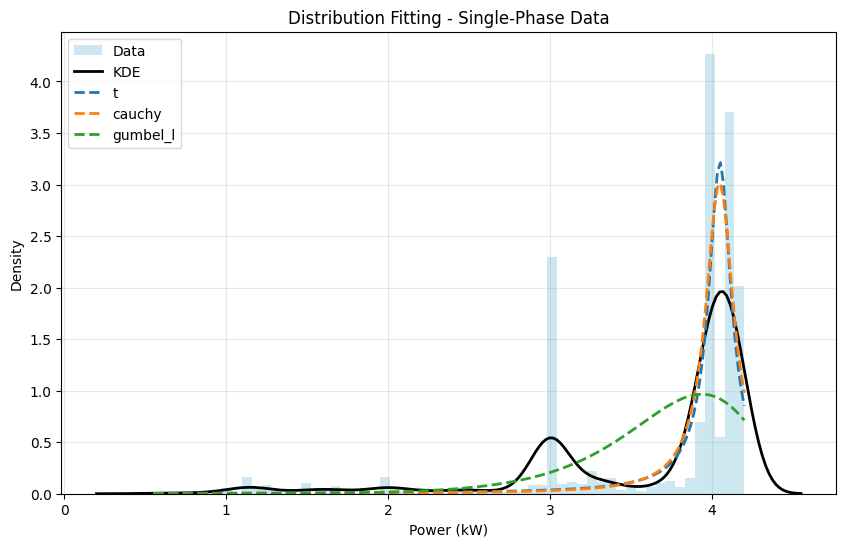

In [4]:
# Statistical Distribution Analysis - Single-Phase Data
print("\n" + "="*60)
print("STATISTICAL DISTRIBUTION FITTING - SINGLE-PHASE DATA")
print("="*60)

# Use single-phase power data
data = one_phase_power
print(f"\n1. Analyzing {len(data)} single-phase installations...")

# Define distributions to test
distributions = [
    stats.norm, stats.expon, stats.gamma, stats.lognorm, stats.weibull_min,
    stats.cauchy, stats.t, stats.logistic, stats.uniform, stats.pareto,
    stats.rayleigh, stats.gumbel_r, stats.gumbel_l, stats.chi2, stats.f
]

print("2. Testing statistical distributions...")
aic_values = {}
for dist in distributions:
    try:
        params = dist.fit(data)
        log_likelihood = np.sum(dist.logpdf(data, *params))
        aic = 2 * len(params) - 2 * log_likelihood
        aic_values[dist] = aic
    except:
        aic_values[dist] = np.inf

best_fit = sorted(aic_values.items(), key=lambda x: x[1])
print("\n3. Results - Top 5 distributions:")
for i, (dist, aic) in enumerate(best_fit[:5]):
    if aic != np.inf:
        print(f"   {i+1}. {dist.name}: AIC = {aic:.2f}")

print(f"\n   Best fit: {best_fit[0][0].name}")

# Plot results
print("\n4. Creating visualization...")
plt.figure(figsize=(10, 6))
plt.hist(data, bins=60, density=True, alpha=0.6, color='lightblue', label='Data')
sns.kdeplot(data, color='black', linewidth=2, label='KDE')

x = np.linspace(min(data), max(data), 200)
for i, (dist, _) in enumerate(best_fit[:3]):
    try:
        params = dist.fit(data)
        plt.plot(x, dist.pdf(x, *params), linewidth=2, linestyle='--',
                label=f'{dist.name}')
    except:
        continue

plt.title('Distribution Fitting - Single-Phase Data')
plt.xlabel('Power (kW)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



STATISTICAL DISTRIBUTION FITTING - THREE-PHASE DATA

1. Analyzing 9357 three-phase installations...
2. Testing statistical distributions...

3. Results - Top 5 distributions:
   1. f: AIC = 39681.98
   2. lognorm: AIC = 39689.66
   3. chi2: AIC = 39733.36
   4. gamma: AIC = 39733.36
   5. gumbel_r: AIC = 39744.31

   Best fit: f

4. Creating visualization...


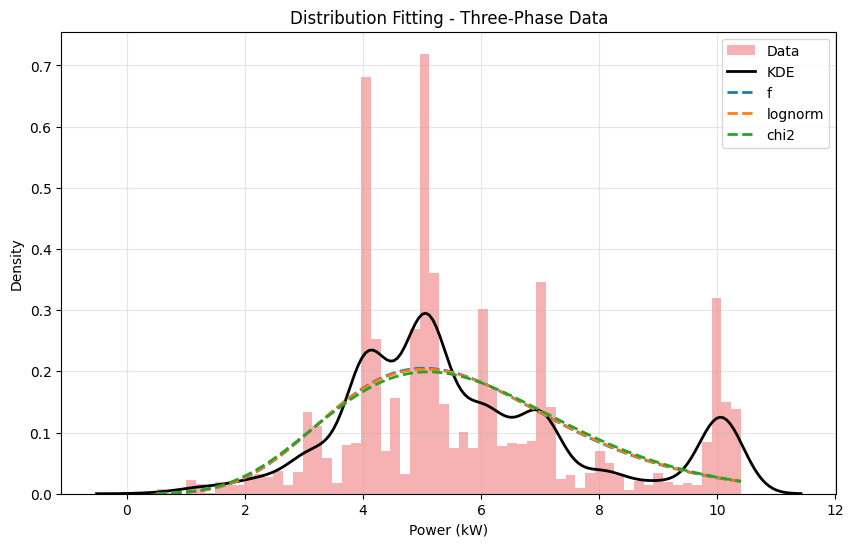

In [5]:
# Statistical Distribution Analysis - Three-Phase Data
print("\n" + "="*60)
print("STATISTICAL DISTRIBUTION FITTING - THREE-PHASE DATA")
print("="*60)

# Use three-phase power data
data = three_phase_power
print(f"\n1. Analyzing {len(data)} three-phase installations...")

# Define distributions to test
distributions = [
    stats.norm, stats.expon, stats.gamma, stats.lognorm, stats.weibull_min,
    stats.cauchy, stats.t, stats.logistic, stats.uniform, stats.pareto,
    stats.rayleigh, stats.gumbel_r, stats.gumbel_l, stats.chi2, stats.f
]

print("2. Testing statistical distributions...")

aic_values = {}
for dist in distributions:
    try:
        params = dist.fit(data)
        log_likelihood = np.sum(dist.logpdf(data, *params))
        aic = 2 * len(params) - 2 * log_likelihood
        aic_values[dist] = aic
    except:
        aic_values[dist] = np.inf

best_fit = sorted(aic_values.items(), key=lambda x: x[1])
print("\n3. Results - Top 5 distributions:")
for i, (dist, aic) in enumerate(best_fit[:5]):
    if aic != np.inf:
        print(f"   {i+1}. {dist.name}: AIC = {aic:.2f}")

print(f"\n   Best fit: {best_fit[0][0].name}")

# Plot results
print("\n4. Creating visualization...")
plt.figure(figsize=(10, 6))
plt.hist(data, bins=60, density=True, alpha=0.6, color='lightcoral', label='Data')
sns.kdeplot(data, color='black', linewidth=2, label='KDE')

x = np.linspace(min(data), max(data), 200)
for i, (dist, _) in enumerate(best_fit[:3]):
    try:
        params = dist.fit(data)
        plt.plot(x, dist.pdf(x, *params), linewidth=2, linestyle='--',
                label=f'{dist.name}')
    except:
        continue

plt.title('Distribution Fitting - Three-Phase Data')
plt.xlabel('Power (kW)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



PROBABILITY MASS FUNCTION GENERATION - THREE-PHASE DATA

1. Calculating frequency distribution...
   Unique power values: 647
   Probability sum: 1.000000

2. Demonstrating random sampling...
   Randomly selected value: 4.98 kW

3. Creating PMF visualization...


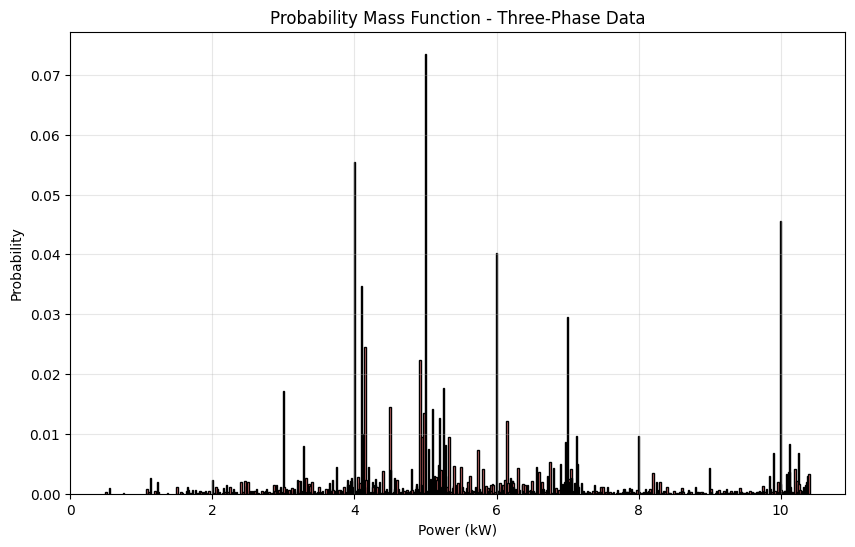

In [6]:
# Probability Mass Function Generation - Three-Phase Data
print("\n" + "="*60)
print("PROBABILITY MASS FUNCTION GENERATION - THREE-PHASE DATA")
print("="*60)

# Calculate frequency distribution
print("\n1. Calculating frequency distribution...")
value_counts = pd.Series(three_phase_power).value_counts().sort_index()
values = value_counts.index
probabilities = value_counts / value_counts.sum()

print(f"   Unique power values: {len(values)}")
print(f"   Probability sum: {probabilities.sum():.6f}")

# Demonstrate random sampling
print("\n2. Demonstrating random sampling...")
np.random.seed(42)
random_value = np.random.choice(values, p=probabilities)
print(f"   Randomly selected value: {random_value:.2f} kW")

# Create visualization
print("\n3. Creating PMF visualization...")
plt.figure(figsize=(10, 6))
plt.bar(values, probabilities, width=0.02, color='lightcoral', edgecolor='black')
plt.title('Probability Mass Function - Three-Phase Data')
plt.xlabel('Power (kW)')
plt.ylabel('Probability')
plt.grid(True, alpha=0.3)
plt.show()



PROBABILITY MASS FUNCTION GENERATION - SINGLE-PHASE DATA

1. Calculating frequency distribution...
   Unique power values: 226
   Probability sum: 1.000000

2. Demonstrating random sampling...
   Randomly selected value: 3.96 kW

3. Creating PMF visualization...


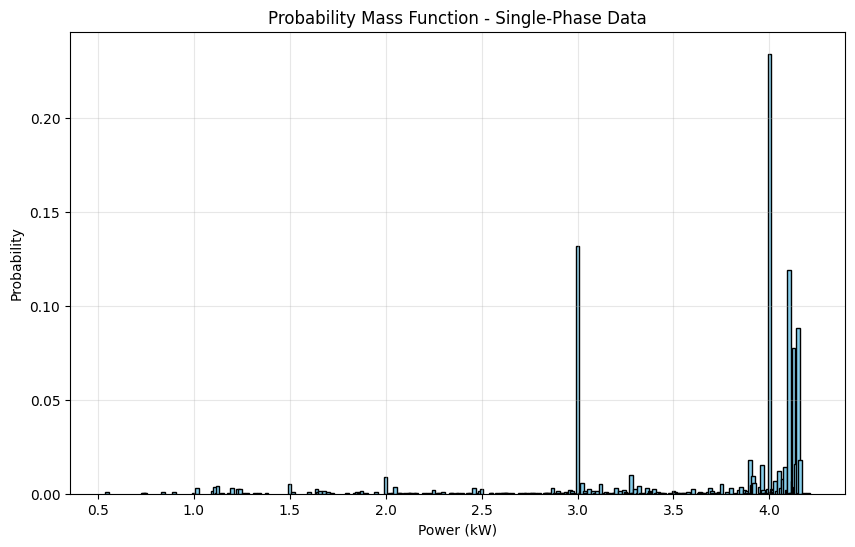

In [7]:
# Probability Mass Function Generation - Single-Phase Data
print("\n" + "="*60)
print("PROBABILITY MASS FUNCTION GENERATION - SINGLE-PHASE DATA")
print("="*60)

# Calculate frequency distribution
print("\n1. Calculating frequency distribution...")
value_counts = pd.Series(one_phase_power).value_counts().sort_index()
values = value_counts.index
probabilities = value_counts / value_counts.sum()

print(f"   Unique power values: {len(values)}")
print(f"   Probability sum: {probabilities.sum():.6f}")

# Demonstrate random sampling
print("\n2. Demonstrating random sampling...")
np.random.seed(42)
random_value = np.random.choice(values, p=probabilities)
print(f"   Randomly selected value: {random_value:.2f} kW")

# Create visualization
print("\n3. Creating PMF visualization...")
plt.figure(figsize=(10, 6))
plt.bar(values, probabilities, width=0.02, color='skyblue', edgecolor='black')
plt.title('Probability Mass Function - Single-Phase Data')
plt.xlabel('Power (kW)')
plt.ylabel('Probability')
plt.grid(True, alpha=0.3)
plt.show()
